In [12]:
import numpy as np
import gudhi as gd
import os
import pandas as pd
from PIL import Image
import pickle
from gudhi.representations import vector_methods
from scipy.interpolate import interp1d 
import matplotlib.pyplot as plt

import struct
import random


In [13]:
class TDA_IO(object):
    
    @staticmethod
    def read_dat(path):
        '''
        path: path to the .dat binary file
        Note: the dat file has file identifier (pengxiang's version)
        '''
        fileIn = open(path, "rb")
        fileID = struct.unpack('I', fileIn.read(4))[0]
        dims   = struct.unpack('I', fileIn.read(4))[0]
        shape  = struct.unpack(str(dims)+'I', fileIn.read(4 * dims))
        dat    = struct.unpack(str(np.prod(shape))+'d', fileIn.read(8*np.prod(shape)))
        dat    = np.reshape(dat, shape)
        fileIn.close()
        return dat
    
    @staticmethod
    def cvt_dat2cloud(dat):
        shape = dat.shape
        min_val = np.amin(dat)
        valid_pts = np.prod(shape) - np.sum(dat==min_val)
        pt_cloud = np.zeros((valid_pts, 3),dtype=int)
        
#         norm = mpl.colors.Normalize(vmin=np.amin(dat), vmax=np.amax(dat))
#         cmap = cm.hot
#         m = cm.ScalarMappable(norm=norm, cmap=cmap)
        
        cnt = 0
        for i in range(shape[0]):
            for j in range(shape[1]):
                for k in range(shape[2]):
                    if dat[i][j][k] > min_val:
                        #color = m.to_rgba(dat[i][j][k])
                        val_ = [i, j, k]#, color[0], color[1], color[2], random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)]
                        pt_cloud[cnt,:] = val_
                        cnt = cnt + 1
        return pt_cloud
    
def imadjust(x,a,b,c,d,gamma=1):
    # Similar to imadjust in MATLAB.
    # Converts an image range from [a,b] to [c,d].
    # The Equation of a line can be used for this transformation:
    #   y=((d-c)/(b-a))*(x-a)+c
    # However, it is better to use a more generalized equation:
    #   y=((x-a)/(b-a))^gamma*(d-c)+c
    # If gamma is equal to 1, then the line equation is used.
    # When gamma is not equal to 1, then the transformation is not linear.

    y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
    return y

In [14]:
data_path = './ISPY-1_refined/volume'
imgs = [f for f in os.listdir(data_path)]
filtration = np.asarray(list(range(1, 255)))
imgs.sort(key = lambda x: int(x.split('_')[1]))
print(imgs[0])
# dat = TDA_IO.read_dat(path2)


ISPY_1001_vol2_sup.dat


In [15]:
for i,img in enumerate(imgs):
    if i == 0:
        img_path = os.path.join(data_path, img)
        dat = TDA_IO.read_dat(img_path)
        dat = imadjust(dat,dat.min(),dat.max(),0,255)
        lh = 255 - np.asarray(dat)
        lh_vector = np.asarray(lh).flatten()
        lh_cubic = gd.CubicalComplex(
                dimensions=[lh.shape[0], lh.shape[1], lh.shape[2]],
                top_dimensional_cells=lh_vector
            )
        lh_cubic.compute_persistence(homology_coeff_field=2, min_persistence=10)
        pd0 = lh_cubic.persistence_intervals_in_dimension(1)
        pd1 = lh_cubic.persistence_intervals_in_dimension(2)
        pd2 = lh_cubic.persistence_intervals_in_dimension(0)
        bc = vector_methods.BettiCurve(predefined_grid=filtration)
        result1 = bc(pd0)
        result2 = bc(pd1)
        result9 = bc(pd2)
    if i == 1:
        img_path = os.path.join(data_path, img)
        dat = TDA_IO.read_dat(img_path)
        dat = imadjust(dat,dat.min(),dat.max(),0,255)
        lh = 255 - np.asarray(dat)
        lh_vector = np.asarray(lh).flatten()
        lh_cubic = gd.CubicalComplex(
                dimensions=[lh.shape[0], lh.shape[1], lh.shape[2]],
                top_dimensional_cells=lh_vector
            )
        lh_cubic.compute_persistence(homology_coeff_field=2, min_persistence=10)
        pd0 = lh_cubic.persistence_intervals_in_dimension(1)
        pd1 = lh_cubic.persistence_intervals_in_dimension(2)
        bc = vector_methods.BettiCurve(predefined_grid=filtration)
        result3 = bc(pd0)
        result4 = bc(pd1)  
    if i == 9:
        img_path = os.path.join(data_path, img)
        dat = TDA_IO.read_dat(img_path)
        dat = imadjust(dat,dat.min(),dat.max(),0,255)
        lh = 255 - np.asarray(dat)
        lh_vector = np.asarray(lh).flatten()
        lh_cubic = gd.CubicalComplex(
                dimensions=[lh.shape[0], lh.shape[1], lh.shape[2]],
                top_dimensional_cells=lh_vector
            )
        lh_cubic.compute_persistence(homology_coeff_field=2, min_persistence=10)
        pd0 = lh_cubic.persistence_intervals_in_dimension(1)
        pd1 = lh_cubic.persistence_intervals_in_dimension(2)
        pd2 = lh_cubic.persistence_intervals_in_dimension(0)
        bc = vector_methods.BettiCurve(predefined_grid=filtration)
        result5 = bc(pd0)
        result6 = bc(pd1)
    if i == 10:
        img_path = os.path.join(data_path, img)
        dat = TDA_IO.read_dat(img_path)
        dat = imadjust(dat,dat.min(),dat.max(),0,255)
        lh = 255 - np.asarray(dat)
        lh_vector = np.asarray(lh).flatten()
        lh_cubic = gd.CubicalComplex(
                dimensions=[lh.shape[0], lh.shape[1], lh.shape[2]],
                top_dimensional_cells=lh_vector
            )
        lh_cubic.compute_persistence(homology_coeff_field=2, min_persistence=10)
        pd0 = lh_cubic.persistence_intervals_in_dimension(1)
        pd1 = lh_cubic.persistence_intervals_in_dimension(2)
        bc = vector_methods.BettiCurve(predefined_grid=filtration)
        result7 = bc(pd0)
        result8 = bc(pd1)    

Text(0.5, 1.0, 'dim1')

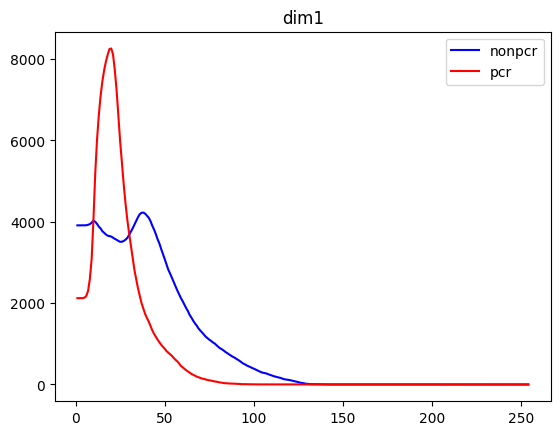

In [16]:
plt.plot(filtration, result1, color='b', label = 'nonpcr')
plt.plot(filtration, result5, color='r', label = 'pcr')
plt.legend()
plt.title('dim1')

Text(0.5, 1.0, 'dim2')

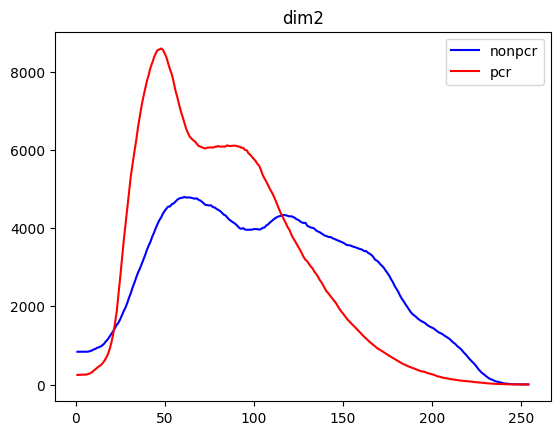

In [17]:
plt.plot(filtration, result2, color='b', label = 'nonpcr')
plt.plot(filtration, result6, color='r', label = 'pcr')
plt.legend()
plt.title('dim2')

Text(0.5, 1.0, 'dim1_')

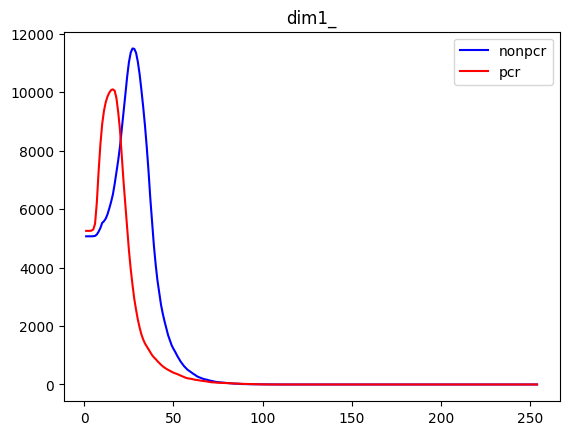

In [18]:
plt.plot(filtration, result3, color='b', label = 'nonpcr')
plt.plot(filtration, result7, color='r', label = 'pcr')
plt.legend()
plt.title('dim1_')

Text(0.5, 1.0, 'dim2_')

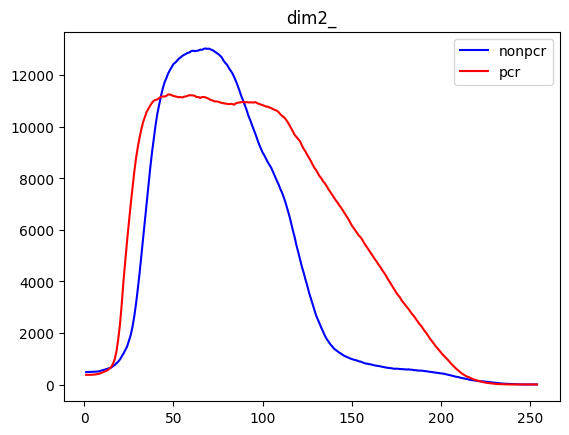

In [19]:
plt.plot(filtration, result4, color='b', label = 'nonpcr')
plt.plot(filtration, result8, color='r', label = 'pcr')
plt.legend()
plt.title('dim2_')

In [3]:
a = '/Users/zouzhilin/PycharmProjects/TopoTxR-main/ISPY-1_refined/sup_/ISPY_1168_vol2_sup.dat'
print(a.split('ISPY_')[1].split('_')[0])

1168


In [1]:
a = [1,2,3,4,5,6]
print(a[:3])

[1, 2, 3]
